In [48]:
import numpy as np #Usuel
import matplotlib.pyplot as plt #Représentations graphiques
import scipy.stats as sp_stat #Génération des données selon une loi de Poisson

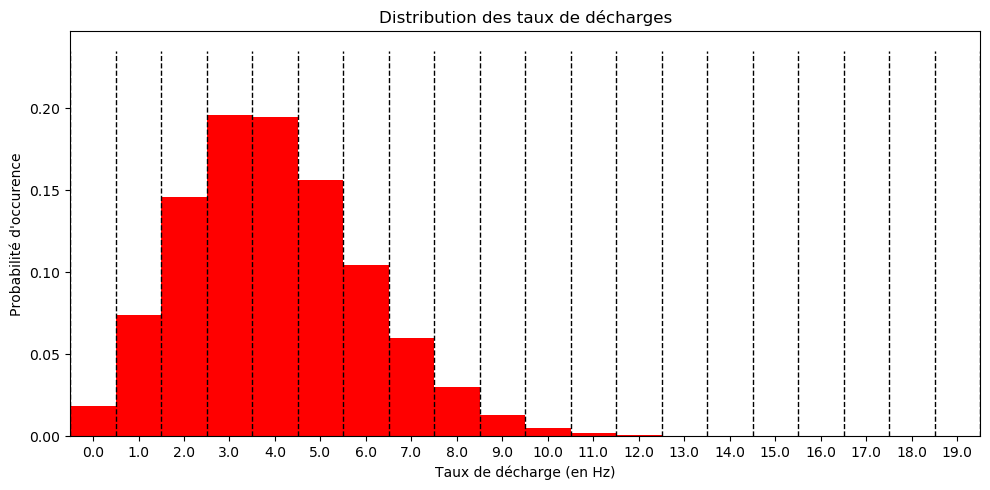

In [49]:
#Variables modulables
mu_ni=4
loc=0
nbr_neuron=1000000
nbr_bins=20
ni_max=20

ni=sp_stat.poisson.rvs(mu=mu_ni,loc=loc,size=nbr_neuron)
#ni=sp_stat.norm.rvs(loc=loc,scale=mu_ni,size=nbr_neuron)

#Calcul de l'histogramme
p_ni,bin_ni=np.histogram(ni,bins=nbr_bins,range=(0,ni_max),density=True)
bin_mid_ni=1/2*(np.sum((bin_ni[1:],bin_ni[:-1]),axis=0))

#Représentation Graphique
fig,ax=plt.subplots(figsize=(10,5))
ax.bar(x=bin_mid_ni,height=p_ni,width=(ni_max/nbr_bins),color="red")
ax.vlines(x=[x for x in bin_ni],ymin=0,ymax=p_ni.max()+0.2*p_ni.max(),color="black",linestyle="dashed",lw=1)
ax.set_xticks(bin_mid_ni)
ax.set_xticklabels([round(x) for x in np.linspace(0,ni_max-1,nbr_bins)])
ax.set_xlim(0,ni_max)
ax.set_xlabel("Taux de décharge (en Hz)")
ax.set_ylabel("Probabilité d'occurence")
ax.set_title("Distribution des taux de décharges")
plt.tight_layout()
plt.show()

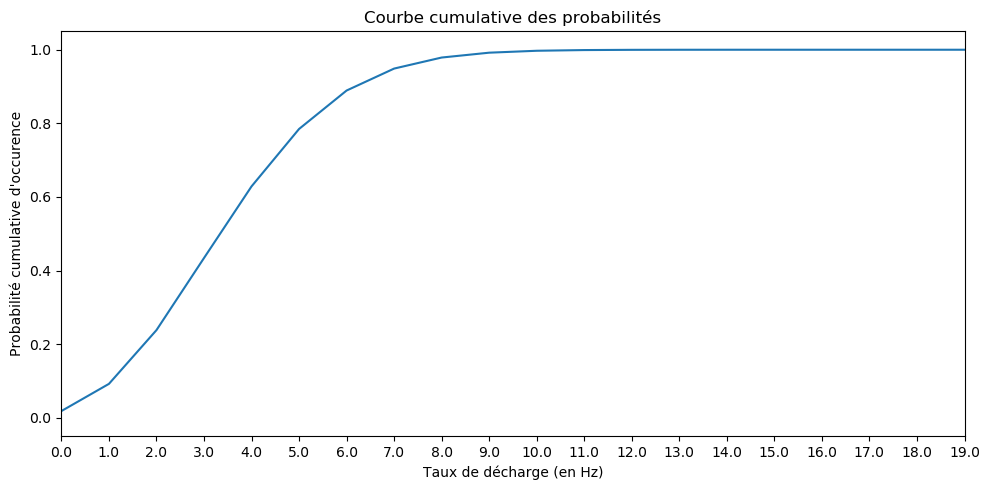

In [50]:
#Calcul des probabilités cumulatives
P_ni=np.cumsum(p_ni)

#Représentation graphique
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(bin_ni[:-1],P_ni)
ax.set_xticks(bin_ni[:-1])
ax.set_xticklabels([round(x,0) for x in np.linspace(0,ni_max-1,nbr_bins)])
ax.set_xlim(bin_ni.min(),bin_ni[:-1].max())
ax.set_xlabel("Taux de décharge (en Hz)")
ax.set_ylim(-0.05,1.05)
ax.set_ylabel("Probabilité cumulative d'occurence")
ax.set_title("Courbe cumulative des probabilités")
plt.tight_layout()
plt.show()

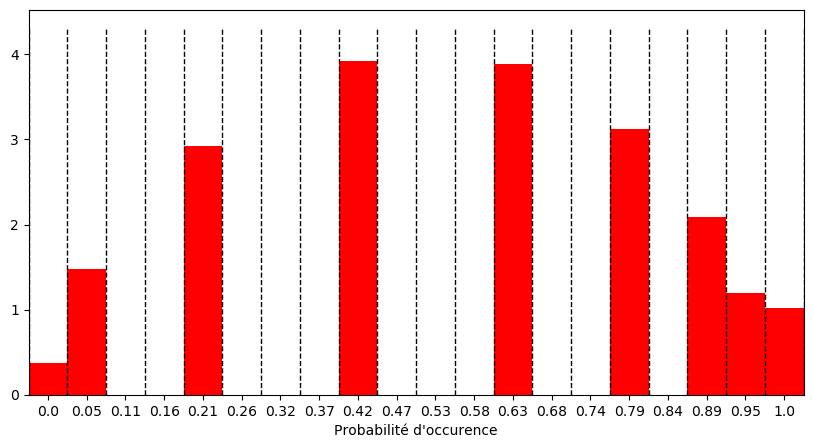

In [51]:
#Variable
nbr_bins_interp=nbr_bins

#Calcul de l'interpolation
ni_interp=np.interp(ni,bin_ni[:-1],P_ni)
p_ni_interp,bin_ni_interp=np.histogram(ni_interp,bins=nbr_bins_interp,range=(0,1),density=True)
bin_mid_ni_interp=1/2*(np.sum((bin_ni_interp[1:],bin_ni_interp[:-1]),axis=0))

#Représentation graphique
fig,ax=plt.subplots(figsize=(10,5))
ax.bar(x=bin_mid_ni_interp,height=p_ni_interp,width=1/(nbr_bins_interp),color="red")
ax.vlines(x=[x for x in bin_ni_interp],ymin=0,ymax=p_ni_interp.max()+0.1*p_ni_interp.max(),color="black",linestyle="dashed",lw=1)
ax.set_xticks(np.linspace(bin_mid_ni_interp[0],bin_mid_ni_interp[-1],nbr_bins_interp),)
ax.set_xticklabels([round(x,2) for x in np.linspace(0,1,nbr_bins_interp)])
ax.set_xlim(bin_ni_interp[0],bin_ni_interp[-1])
ax.set_title("Histogramme Egalisé")
ax.set_xlabel("Probabilité d'occurence")
ax.set_ylabel("Densité d'occurence")
plt.show()